In [ ]:

import pandas as pd
import numpy as np
import csv
import json
import urllib.request
import ssl
import matplotlib.pyplot as plt
%matplotlib inline

ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns

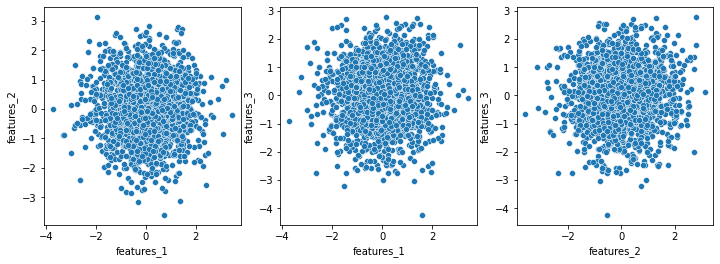

In [ ]:
#EX1

file = 'regression_generated.csv'
data = pd.read_csv(file)

fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (12,4))
sns.scatterplot(x='features_1', y='features_2',ax = ax1, data=data)
sns.scatterplot(x='features_1',y='features_3',ax = ax2, data=data)
sns.scatterplot(x='features_2',y='features_3',ax = ax3, data=data)

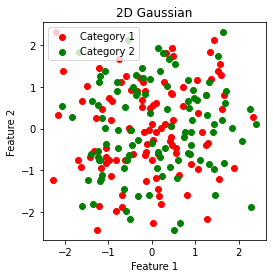

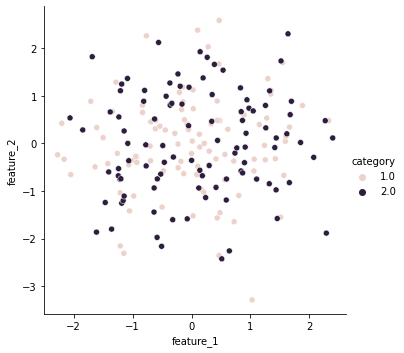

In [ ]:
def generate_gaussian_dataset(nsamples1,nsamples2, mean1,sd1, mean2,sd2):
    x = pd.DataFrame(np.random.normal(loc=mean1,scale=sd1,size =(nsamples1,2)), columns = ('feature_1','feature_2'))
    y = pd.DataFrame(np.random.normal(loc=mean2,scale=sd2,size =(nsamples2,2)), columns = ('feature_1','feature_2'))
    x['category'] = pd.Series(np.ones(nsamples1))
    y['category'] = pd.Series(2*np.ones(nsamples2))
    data = pd.concat([x,y])
    return data

(nsamples1,nsamples2,mean1,mean2,sd1,sd2) =(100,100,0,0,1,1)
data = generate_gaussian_dataset(nsamples1,nsamples2,mean1,sd1,mean2,sd2)
data

fig, ax = plt.subplots(figsize = (4,4))
ax.scatter(x = data[data['category']==1].loc[:,'feature_1'], y = data[data['category']==2].loc[:,'feature_2'], c='r',label='Category 1')
ax.scatter(x = data[data['category']==2].loc[:,'feature_1'], y = data[data['category']==2].loc[:,'feature_2'], c='g',label='Category 2')
ax.set_title('2D Gaussian')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend(loc='upper left')

#using seaborn
sns.relplot(x='feature_1',y='feature_2', hue='category', data=data)